In [261]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from PIL import Image
from IPython.display import display

In [262]:
def load_image(img_path):
    image = Image.open(img_path)
    return image

In [263]:
image = load_image('Lenna_(test_image).png')
image = image.convert('L')

In [264]:
image.show()

In [265]:
img_array = np.array(image)

# Wyświetlanie histogramu wczytanego obrazu

In [266]:
gray_hist_data = img_array.flatten()

(array([0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
        0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
        0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
        0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
        0.000e+00, 1.000e+00, 7.000e+00, 1.900e+01, 2.900e+01, 5.900e+01,
        9.700e+01, 1.370e+02, 1.820e+02, 2.210e+02, 2.990e+02, 4.220e+02,
        4.990e+02, 6.140e+02, 7.580e+02, 9.440e+02, 1.060e+03, 1.255e+03,
        1.441e+03, 1.648e+03, 1.760e+03, 1.884e+03, 1.998e+03, 2.090e+03,
        2.023e+03, 2.101e+03, 2.088e+03, 2.030e+03, 1.978e+03, 1.808e+03,
        1.730e+03, 1.668e+03, 1.577e+03, 1.469e+03, 1.278e+03, 1.236e+03,
        1.220e+03, 1.003e+03, 9.300e+02, 9.750e+02, 8.800e+02, 8.930e+02,
        7.890e+02, 7.980e+02, 7.690e+02, 7.820e+02, 8.500e+02, 8.210e+02,
        8.310e+02, 7.850e+02, 8.830e+02, 9.060e+02, 8.670e+02, 8.540e+02,
        9.470e+02, 9.730e+02, 9.060e+0

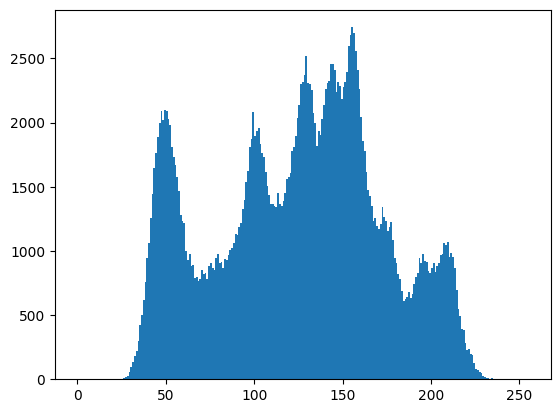

In [267]:
plt.hist(gray_hist_data, bins = 255, range=(0, 255))

# Rozciąganie histogramu

## LUT TABLE

In [268]:
lut_table = np.zeros(256)
max_value = max(gray_hist_data)
min_value = min(gray_hist_data)
for i in range(0, len(lut_table)):
    if i >= max_value:
        lut_table[i] = 255
        
    elif i <= min_value:
        lut_table[i] = 0
        
    else:
        lut_table[i] = int((i - min_value)/(max_value - min_value) * 255)

In [269]:
lut_table

array([  0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   1.,   2.,   3.,   4.,   5.,   6.,   8.,
         9.,  10.,  11.,  12.,  13.,  15.,  16.,  17.,  18.,  19.,  20.,
        22.,  23.,  24.,  25.,  26.,  27.,  28.,  30.,  31.,  32.,  33.,
        34.,  35.,  37.,  38.,  39.,  40.,  41.,  42.,  44.,  45.,  46.,
        47.,  48.,  49.,  51.,  52.,  53.,  54.,  55.,  56.,  57.,  59.,
        60.,  61.,  62.,  63.,  64.,  66.,  67.,  68.,  69.,  70.,  71.,
        73.,  74.,  75.,  76.,  77.,  78.,  79.,  81.,  82.,  83.,  84.,
        85.,  86.,  88.,  89.,  90.,  91.,  92.,  93.,  95.,  96.,  97.,
        98.,  99., 100., 102., 103., 104., 105., 106., 107., 108., 110.,
       111., 112., 113., 114., 115., 117., 118., 119., 120., 121., 122.,
       124., 125., 126., 127., 128., 129., 130., 132., 133., 134., 135.,
       136., 137., 139., 140., 141., 142., 143., 14

In [270]:
extend_hist_data = lut_table[img_array]

In [271]:
extend_hist_data

array([[158., 158., 158., ..., 168., 150., 119.],
       [158., 158., 158., ..., 168., 150., 119.],
       [158., 158., 158., ..., 168., 150., 119.],
       ...,
       [ 20.,  20.,  28., ...,  91.,  86.,  84.],
       [ 22.,  22.,  34., ...,  91.,  92.,  96.],
       [ 22.,  22.,  34., ...,  91.,  92.,  96.]])

In [272]:
extend_hist_data_flatten = extend_hist_data.flatten()

(array([1.000e+00, 7.000e+00, 1.900e+01, 2.900e+01, 5.900e+01, 9.700e+01,
        1.370e+02, 0.000e+00, 1.820e+02, 2.210e+02, 2.990e+02, 4.220e+02,
        4.990e+02, 6.140e+02, 0.000e+00, 7.580e+02, 9.440e+02, 1.060e+03,
        1.255e+03, 1.441e+03, 1.648e+03, 0.000e+00, 1.760e+03, 1.884e+03,
        1.998e+03, 2.090e+03, 2.023e+03, 2.101e+03, 2.088e+03, 0.000e+00,
        2.030e+03, 1.978e+03, 1.808e+03, 1.730e+03, 1.668e+03, 1.577e+03,
        0.000e+00, 1.469e+03, 1.278e+03, 1.236e+03, 1.220e+03, 1.003e+03,
        9.300e+02, 0.000e+00, 9.750e+02, 8.800e+02, 8.930e+02, 7.890e+02,
        7.980e+02, 7.690e+02, 0.000e+00, 7.820e+02, 8.500e+02, 8.210e+02,
        8.310e+02, 7.850e+02, 8.830e+02, 9.060e+02, 0.000e+00, 8.670e+02,
        8.540e+02, 9.470e+02, 9.730e+02, 9.060e+02, 9.120e+02, 0.000e+00,
        8.670e+02, 9.340e+02, 9.330e+02, 9.700e+02, 1.005e+03, 1.019e+03,
        0.000e+00, 1.060e+03, 1.133e+03, 1.125e+03, 1.186e+03, 1.219e+03,
        1.324e+03, 1.400e+03, 0.000e+0

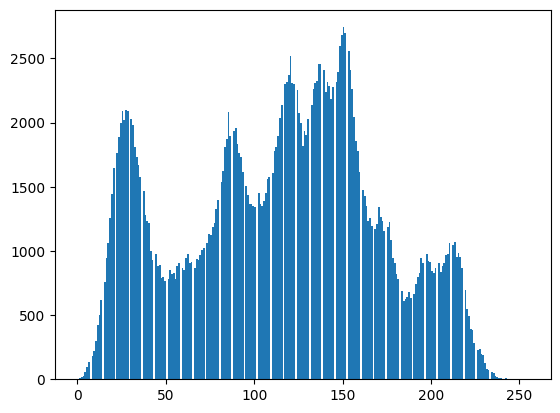

In [273]:
plt.hist(extend_hist_data_flatten, bins = 255, range = (0,255))

In [274]:
extend_image = Image.fromarray(extend_hist_data)

In [275]:
extend_image.show()

# Wyrównanie histogramu

## histogram rozkładu

In [276]:
hist_data, bin_edges = np.histogram(gray_hist_data, bins = 255, range=(0, 255))

In [277]:
distribution = np.cumsum(hist_data) / len(gray_hist_data)

In [278]:
distribution

array([0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 3.81469727e-06, 3.05175781e-05, 1.02996826e-04,
       2.13623047e-04, 4.38690186e-04, 8.08715820e-04, 1.33132935e-03,
       2.02560425e-03, 2.86865234e-03, 4.00924683e-03, 5.61904907e-03,
       7.52258301e-03, 9.86480713e-03, 1.27563477e-02, 1.63574219e-02,
       2.04010010e-02, 2.51884460e-02, 3.06854248e-02, 3.69720459e-02,
       4.36859131e-02, 5.08728027e-02, 5.84945679e-02, 6.64672852e-02,
       7.41844177e-02, 8.21990967e-02, 9.01641846e-02, 9.79080200e-02,
       1.05453491e-01, 1.12350464e-01, 1.18949890e-01, 1.25312805e-01,
      

In [279]:
d_zero = None
for i in range(len(distribution)):
    if distribution[i]!=0:
        d_zero = distribution[i]
        break
        

In [280]:
d_zero

np.float64(3.814697265625e-06)

In [281]:
lut_table_equalization = np.zeros(256)

In [282]:
for i in range(255):
    if distribution[i] < d_zero:
        lut_table_equalization[i] = 0
    else:
        lut_table_equalization[i] = int((distribution[i] - d_zero)/ (1-d_zero) * (len(hist_data) - 1))

In [283]:
lut_table_equalization

array([  0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   1.,   1.,   1.,   2.,   3.,   4.,   5.,   6.,   7.,   9.,
        11.,  12.,  14.,  16.,  18.,  20.,  22.,  24.,  26.,  28.,  30.,
        31.,  33.,  34.,  36.,  37.,  38.,  39.,  40.,  41.,  42.,  42.,
        43.,  44.,  45.,  45.,  46.,  47.,  48.,  49.,  50.,  50.,  51.,
        52.,  53.,  54.,  55.,  56.,  57.,  57.,  58.,  59.,  60.,  61.,
        62.,  63.,  64.,  66.,  67.,  68.,  69.,  71.,  72.,  74.,  76.,
        78.,  80.,  82.,  84.,  85.,  87.,  89.,  90.,  92.,  93.,  95.,
        96.,  97.,  98., 100., 101., 103., 104., 105., 107., 108., 110.,
       112., 113., 115., 117., 119., 121., 124., 126., 128., 131., 133.,
       135., 137., 139., 141., 143., 145., 146., 149., 151., 153., 155.,
       158., 160., 162., 164., 167., 169., 171., 17

In [284]:
equal_hist_data = lut_table_equalization[img_array]

In [285]:
equal_hist_data

array([[201., 201., 201., ..., 211., 186., 126.],
       [201., 201., 201., ..., 211., 186., 126.],
       [201., 201., 201., ..., 211., 186., 126.],
       ...,
       [  9.,   9.,  22., ...,  87.,  80.,  76.],
       [ 11.,  11.,  31., ...,  87.,  89.,  93.],
       [ 11.,  11.,  31., ...,  87.,  89.,  93.]])

(array([7.520e+02, 1.220e+03, 6.140e+02, 7.580e+02, 9.440e+02, 1.060e+03,
        1.255e+03, 1.441e+03, 0.000e+00, 1.648e+03, 0.000e+00, 1.760e+03,
        1.884e+03, 0.000e+00, 1.998e+03, 0.000e+00, 2.090e+03, 0.000e+00,
        2.023e+03, 0.000e+00, 2.101e+03, 0.000e+00, 2.088e+03, 0.000e+00,
        2.030e+03, 0.000e+00, 1.978e+03, 0.000e+00, 1.808e+03, 0.000e+00,
        1.730e+03, 1.668e+03, 0.000e+00, 1.577e+03, 1.469e+03, 0.000e+00,
        1.278e+03, 1.236e+03, 1.220e+03, 1.003e+03, 9.300e+02, 9.750e+02,
        1.773e+03, 7.890e+02, 7.980e+02, 1.551e+03, 8.500e+02, 8.210e+02,
        8.310e+02, 7.850e+02, 1.789e+03, 8.670e+02, 8.540e+02, 9.470e+02,
        9.730e+02, 9.060e+02, 9.120e+02, 1.801e+03, 9.330e+02, 9.700e+02,
        1.005e+03, 1.019e+03, 1.060e+03, 1.133e+03, 1.125e+03, 0.000e+00,
        1.186e+03, 1.219e+03, 1.324e+03, 1.400e+03, 0.000e+00, 1.538e+03,
        1.619e+03, 0.000e+00, 1.807e+03, 0.000e+00, 1.871e+03, 0.000e+00,
        2.085e+03, 0.000e+00, 1.895e+0

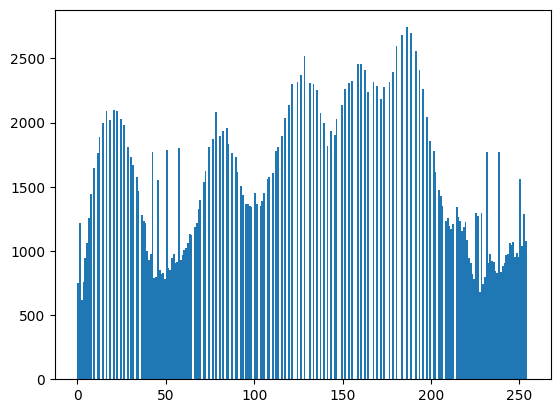

In [286]:
plt.hist(equal_hist_data.flatten(), bins = 255, range= (0,255))

In [287]:
equal_image = Image.fromarray(equal_hist_data)
equal_image.show()